Preparing datasets...
Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,538 (369.29 KB)

 Trainable params: 94,538 (369.29 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.5649 - loss: 1.3519 - val_accuracy: 0.9483 - val_loss: 0.3763
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9087 - loss: 0.4818 - val_accuracy: 0.9576 - val_loss: 0.3117
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9274 - loss: 0.4096 - val_accuracy: 0.9684 - val_loss: 0.2763
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9391 - loss: 0.3690 - val_accuracy: 0.9660 - val_loss: 0.2613
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9454 - loss: 0.3438 - val_accuracy: 0.9725 - val_loss: 0.2438
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9476 - loss: 0.3263 - val_accuracy: 0.9764 - val_loss: 0.2287
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9530 - loss: 0.3129 - val_accuracy: 0.9759 - val_loss: 0.2214
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9542

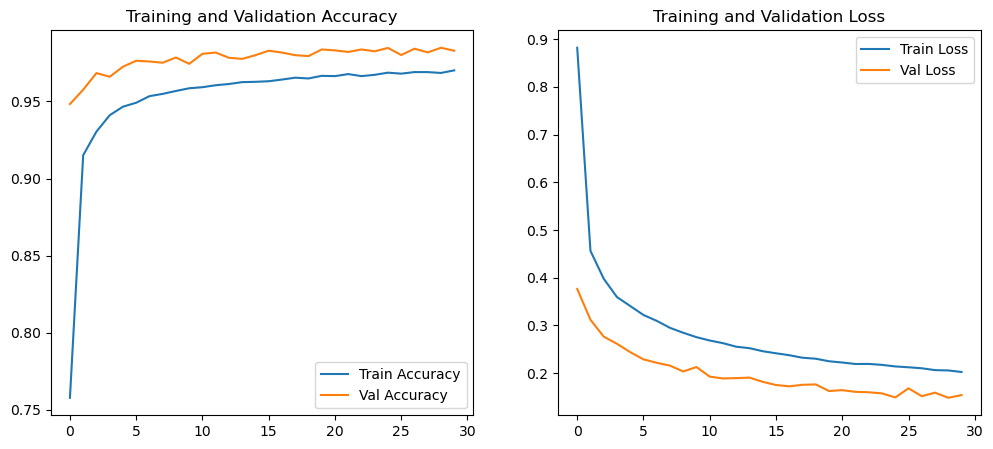

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Paths 

train_dir = "Mnist_dataset\\train"   # should contain 0..9 subfolders
test_dir = "Mnist_dataset\\test"     # should contain 0..9 subfolders


# Dataset Preparation

print("Preparing datasets...")

img_size = (28, 28)
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Cache + prefetch for speed
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ----------------------------
# Model
# ----------------------------
print("Building model...")

inputs = tf.keras.Input(shape=(28, 28, 3))

x = layers.Conv2D(32, (3, 3), activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding="same",
                  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = models.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# Training

print("Training model...")

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30
)

# Save model in modern format

model.save("mnist_cnn.keras")
print("Model saved as mnist_cnn.keras")


# Plot training curves

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()


In [4]:
# ----------------------------
# Print best validation accuracy
# ----------------------------
best_val_acc = max(history.history["val_accuracy"])
best_epoch = history.history["val_accuracy"].index(best_val_acc) + 1

print(f"Best Validation Accuracy: {best_val_acc:.4f} at epoch {best_epoch}")


Best Validation Accuracy: 0.9848 at epoch 29


In [ ]:


import tensorflow as tf
from tensorflow.keras import layers
# Paths

model_path = "mnist_cnn.keras"
test_dir = "Mnist_dataset\\test"   # must contain 0..9 subfolders


# Load Test Dataset

img_size = (28, 28)
batch_size = 64

print("Loading test dataset...")

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

# Normalize (same as training)
normalization_layer = layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Cache + prefetch
AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


# Load Model
print("Loading saved model...")
model = tf.keras.models.load_model(model_path)


# Evaluate

print("Evaluating model on test set...")
loss, accuracy = model.evaluate(test_ds, verbose=1)

print(f"\n Test Accuracy: {accuracy * 100:.2f}%")
print(f" Test Loss: {loss:.4f}")


Loading test dataset...
Found 10000 files belonging to 10 classes.
Loading saved model...
Evaluating model on test set...
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9845 - loss: 0.1532

 Test Accuracy: 98.29%
 Test Loss: 0.1537


In [ ]:


import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image


# Load model
# ----------------------------
model = models.load_model("mnist_cnn.keras")


# Image path (give your image path here)

img_path = "Mnist_dataset\\test\\5\\766.png"  


# Preprocess image

img = image.load_img(img_path, target_size=(28, 28))  # resize to training size
img_array = image.img_to_array(img)                   # convert to array
img_array = img_array / 255.0                         # normalize (same as training)
img_array = np.expand_dims(img_array, axis=0)         # add batch dimension

# Prediction
# ----------------------------
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Predicted class: 5
Class probabilities: [1.0499725e-05 2.3549980e-08 8.1740334e-05 1.1667430e-03 8.4939035e-11
 9.9475276e-01 1.3498297e-06 4.7618020e-08 3.9822259e-03 4.6321370e-06]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted class: 5
Class probabilities: [1.0499725e-05 2.3549980e-08 8.1740334e-05 1.1667430e-03 8.4939035e-11
 9.9475276e-01 1.3498297e-06 4.7618020e-08 3.9822259e-03 4.6321370e-06]


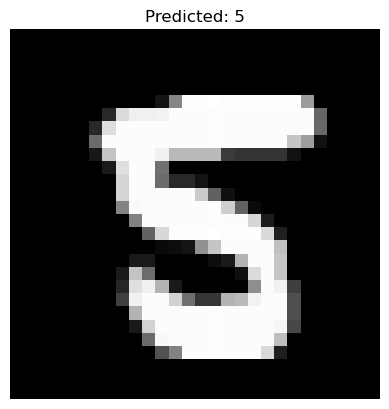

In [ ]:


import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt   


# Load model

model = models.load_model("mnist_cnn.keras")

# Image path (give your image path here)

img_path = "Mnist_dataset\\test\\5\\766.png"  


# Preprocess image
img = image.load_img(img_path, target_size=(28, 28))  # resize to training size
img_array = image.img_to_array(img)                   # convert to array
img_array = img_array / 255.0                         # normalize (same as training)
img_array = np.expand_dims(img_array, axis=0)         # add batch dimension

# ----------------------------
# Prediction

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")

# ----------------------------
# Plot the image
# ----------------------------
plt.imshow(image.load_img(img_path, color_mode="grayscale"), cmap="gray")
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predicted class: 5
Class probabilities (%):
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.01%
Class 3: 0.12%
Class 4: 0.00%
Class 5: 99.48%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.40%
Class 9: 0.00%


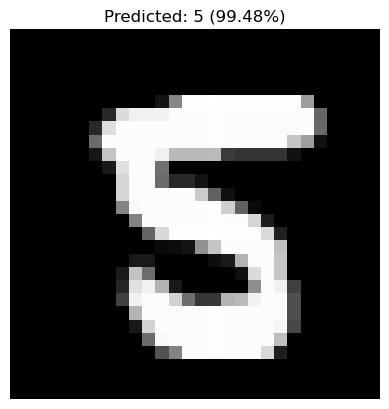

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt   

# ----------------------------
# Load model

model = models.load_model("mnist_cnn.keras")

# ----------------------------
# Image path (give your image path here)

img_path = "Mnist_dataset\\test\\5\\766.png"  

# ----------------------------
# Preprocess image

img = image.load_img(img_path, target_size=(28, 28))  # resize to training size
img_array = image.img_to_array(img)                   # convert to array
img_array = img_array / 255.0                         # normalize (same as training)
img_array = np.expand_dims(img_array, axis=0)         # add batch dimension

# ----------------------------
# Prediction

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Convert probabilities to percentage
percentages = predictions[0] * 100

print(f"Predicted class: {predicted_class}")
print("Class probabilities (%):")
for i, p in enumerate(percentages):
    print(f"Class {i}: {p:.2f}%")

# ----------------------------
# Plot the image

plt.imshow(image.load_img(img_path, color_mode="grayscale"), cmap="gray")
plt.title(f"Predicted: {predicted_class} ({percentages[predicted_class]:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted class: 8
Class probabilities (%):
Class 0: 0.08%
Class 1: 0.00%
Class 2: 0.19%
Class 3: 0.02%
Class 4: 0.00%
Class 5: 0.04%
Class 6: 1.65%
Class 7: 0.00%
Class 8: 98.01%
Class 9: 0.01%


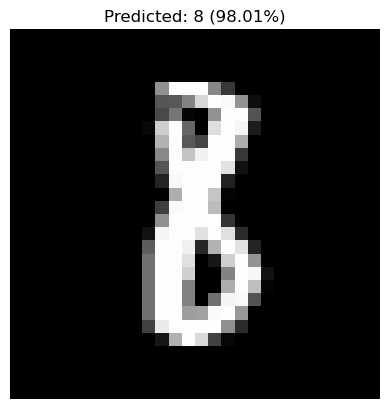

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt   

# ----------------------------
# Load model

model = models.load_model("mnist_cnn.keras")

# ----------------------------
# Image path (give your image path here)

img_path = "Mnist_dataset\\test\\8\\257.png"   

# ----------------------------
# Preprocess image

img = image.load_img(img_path, target_size=(28, 28))  # resize to training size
img_array = image.img_to_array(img)                   # convert to array
img_array = img_array / 255.0                         # normalize (same as training)
img_array = np.expand_dims(img_array, axis=0)         # add batch dimension

# ----------------------------
# Prediction

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Convert probabilities to percentage
percentages = predictions[0] * 100

print(f"Predicted class: {predicted_class}")
print("Class probabilities (%):")
for i, p in enumerate(percentages):
    print(f"Class {i}: {p:.2f}%")

# ----------------------------
# Plot the image

plt.imshow(image.load_img(img_path, color_mode="grayscale"), cmap="gray")
plt.title(f"Predicted: {predicted_class} ({percentages[predicted_class]:.2f}%)")
plt.axis("off")
plt.show()
